In [51]:
import fst
import numpy
from prettytable import PrettyTable

# References 

# SPEECH RECOGNITION WITH WEIGHTED FINITE-STATE TRANSDUCERS
# Mehryar Mohri, Fernando Pereira, Michael Riley
# http://www.cs.nyu.edu/~mohri/pub/hbka.pdf

# Weighted Finite-State Transducers
# Josef R. Novak
# http://www.gavo.t.u-tokyo.ac.jp/~novakj/wfst-algorithms.pdf

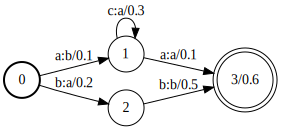

In [52]:
tropical_a = fst.Transducer()

tropical_a.add_arc(0,1,'a','b',0.1)
tropical_a.add_arc(0,2,'b','a',0.2)
tropical_a.add_arc(1,1,'c','a',0.3)
tropical_a.add_arc(2,3,'b','b',0.5)
tropical_a.add_arc(1,3,'a','a',0.1)

tropical_a[3].final = 0.6

tropical_a


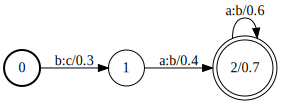

In [53]:
tropical_b = fst.Transducer()

tropical_b.add_arc(0,1,'b','c',0.3)
tropical_b.add_arc(1,2,'a','b',0.4)
tropical_b.add_arc(2,2,'a','b',0.6)

tropical_b[2].final = 0.7

tropical_b

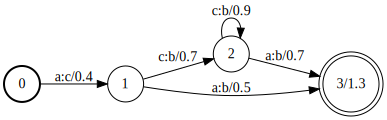

In [54]:
tropical_a.compose(tropical_b)

In [55]:
table_a = PrettyTable()
table_a.field_names = ["Origin", "End", "Input", "Output", "Weight"]
table_a.add_row(['0', '1', 'a', 'b', '0.1'])
table_a.add_row(['0', '2', 'b', 'a', '0.2'])
table_a.add_row(['1', '1', 'c', 'a', '0.3'])
table_a.add_row(['1', '3', 'a', 'a', '0.4'])
table_a.add_row(['2', '3', 'b', 'b', '0.5'])

table_b = PrettyTable()
table_b.field_names = ["Origin", "End", "Input", "Output", "Weight"]
table_b.add_row(['0', '1', 'b', 'c', '0.3'])
table_b.add_row(['1', '2', 'a', 'b', '0.4'])
table_b.add_row(['2', '2', 'a', 'b', '0.6'])

table_c = PrettyTable()
table_c.field_names = ["Origin", "End", "Input", "Output", "Weight"]
table_c.add_row(['0,0', '1,1', 'a', 'c', '0.4'])
table_c.add_row(['1,1', '1,2', 'c', 'b', '0.7'])
table_c.add_row(['1,1', '3,2', 'a', 'b', '0.8'])
table_c.add_row(['1,2', '1,2', 'c', 'b', '0.9'])
table_c.add_row(['1,2', '3,2', 'a', 'b', '1.0'])

print("Transition Table A")
print(table_a)
print("Transition Table B")
print(table_b)
print("Transition Table A compose B")
print(table_c)

 

Transition Table A
+--------+-----+-------+--------+--------+
| Origin | End | Input | Output | Weight |
+--------+-----+-------+--------+--------+
|   0    |  1  |   a   |   b    |  0.1   |
|   0    |  2  |   b   |   a    |  0.2   |
|   1    |  1  |   c   |   a    |  0.3   |
|   1    |  3  |   a   |   a    |  0.4   |
|   2    |  3  |   b   |   b    |  0.5   |
+--------+-----+-------+--------+--------+
Transition Table B
+--------+-----+-------+--------+--------+
| Origin | End | Input | Output | Weight |
+--------+-----+-------+--------+--------+
|   0    |  1  |   b   |   c    |  0.3   |
|   1    |  2  |   a   |   b    |  0.4   |
|   2    |  2  |   a   |   b    |  0.6   |
+--------+-----+-------+--------+--------+
Transition Table A compose B
+--------+-----+-------+--------+--------+
| Origin | End | Input | Output | Weight |
+--------+-----+-------+--------+--------+
|  0,0   | 1,1 |   a   |   c    |  0.4   |
|  1,1   | 1,2 |   c   |   b    |  0.7   |
|  1,1   | 3,2 |   a   |   b  

In [57]:
# Starting with the initial state, a.0 and b.0, we will look for possible pathways.  
# If there is a match, we'll add the terminating node pair to our search path
table_d = PrettyTable()
table_d.field_names = ["a.Origin", "b.Origin", "a.End", "b.End", "a.Input:Output", "b.Input:Output", "Combined Weight"]

# Starting at a.0, b.0, we'll look for instances where a's output matchs b's input
table_d.add_row(['a.0', 'b.0', 'a.1', 'b.1', 'a:b', 'b:c', '0.4'])
table_d.add_row(['a.0', 'b.0', 'a.2', 'b.1', 'b:a', 'b:c', 'null'])

# We found a connection between 0,0 and 1,1.  This adds a.1,b.1 to our search queue
table_d.add_row(['a.1', 'b.1', 'a.1', 'b.2', 'c:a', 'a:b', '0.7'])
table_d.add_row(['a.1', 'b.1', 'a.3', 'b.2', 'a:a', 'a:b', '0.8'])

# We found connections between 1,1 and 1,2; 1,3 and 1,2.
# This adds a.1,b.2and a.3,b.2 to our search queue

# a.1,b.2
table_d.add_row(['a.1', 'b.2', 'a.1', 'b.2', 'c:a', 'a:b', '0.9'])
table_d.add_row(['a.1', 'b.2', 'a.3', 'b.2', 'a:a', 'a:b', '1.0'])

# a.3,b.2
table_d.add_row(['a.3', 'b.2', 'null', 'b.2', 'null', 'a:b', 'null'])

# Nothing new, in queue, we're done
print(table_d)

+----------+----------+-------+-------+----------------+----------------+-----------------+
| a.Origin | b.Origin | a.End | b.End | a.Input:Output | b.Input:Output | Combined Weight |
+----------+----------+-------+-------+----------------+----------------+-----------------+
|   a.0    |   b.0    |  a.1  |  b.1  |      a:b       |      b:c       |       0.4       |
|   a.0    |   b.0    |  a.2  |  b.1  |      b:a       |      b:c       |       null      |
|   a.1    |   b.1    |  a.1  |  b.2  |      c:a       |      a:b       |       0.7       |
|   a.1    |   b.1    |  a.3  |  b.2  |      a:a       |      a:b       |       0.8       |
|   a.1    |   b.2    |  a.1  |  b.2  |      c:a       |      a:b       |       0.9       |
|   a.1    |   b.2    |  a.3  |  b.2  |      a:a       |      a:b       |       1.0       |
|   a.3    |   b.2    |  null |  b.2  |      null      |      a:b       |       null      |
+----------+----------+-------+-------+----------------+----------------+-------